In [1]:
import tensorflow as tf 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
def plot_series(time, series, format="-",start=0, end=None, label=None):
    """This is a function to plot the time series depending on the user inputs"""
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [4]:
def trend(time, slope=0):
    """This function adds trend to the input time series data"""
    return slope * time 

In [5]:
def seasonal_pattern(season_time):
    """To give a random pattern to the data and can be changed"""
    return np.where(season_time<0.4, np.cos(season_time*2*np.pi), 1/np.exp(3*season_time))

def seasonality(time, period, amplitude = 1, phase=0):
    """Repeats the same pattern"""
    season_time = ((time+phase)%period)/period
    return amplitude * seasonal_pattern(season_time)

In [6]:
def noise(time, noise_level = 1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [7]:
time = np.arange(4 * 365 + 1 , dtype= "float32")
baseline = 10
series = trend(time, 0.1)
amplitude = 40
slope = 0.05
noise_level = 5

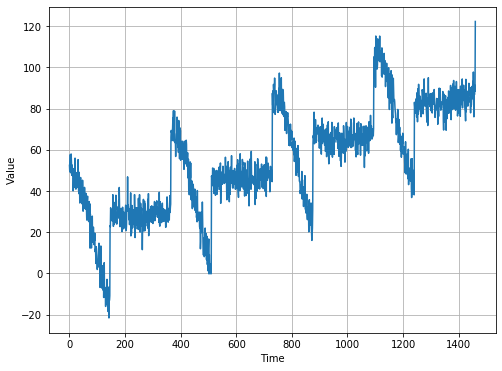

In [8]:
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude= amplitude)
series += noise(time, noise_level = noise_level, seed=42)

plt.figure(figsize=(8,6))
plot_series(time, series)
plt.show()

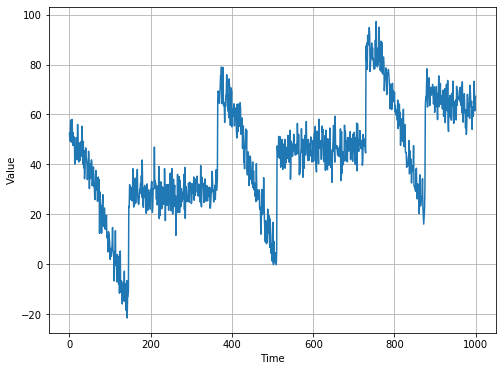

In [9]:
split_time = 1000
x_train = series[:split_time]
x_valid = series[split_time:]
time_train = time[:split_time]
time_valid = time[split_time:]
plt.figure(figsize=(8,6))
plot_series(time_train, x_train)
plt.show()

## Naive forecast 

In [10]:
naive_forecast = series[split_time -1:-1]

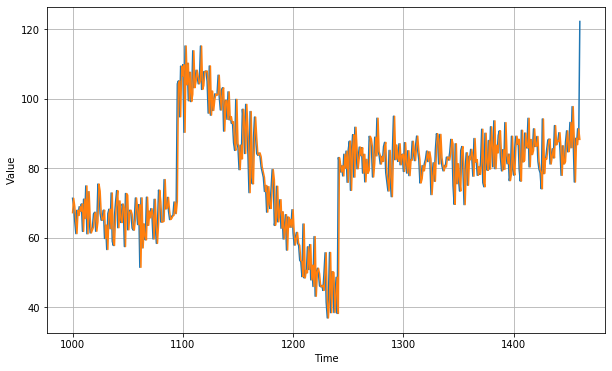

In [11]:
plt.figure(figsize = (10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

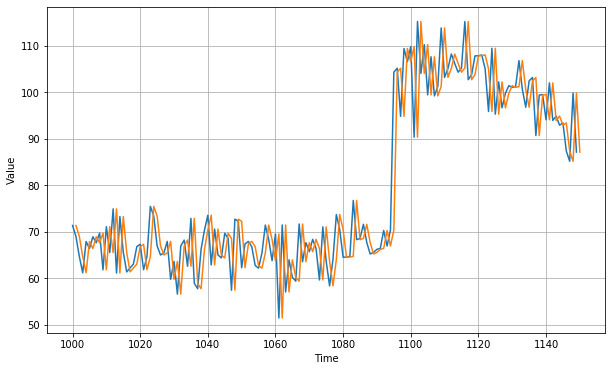

In [12]:
plt.figure(figsize = (10,6))
plot_series(time_valid, x_valid, start=0,end=150)
plot_series(time_valid, naive_forecast, start=1,end=151)

In [13]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937908


In [14]:
def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.
       If window_size=1, then this is equivalent to naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

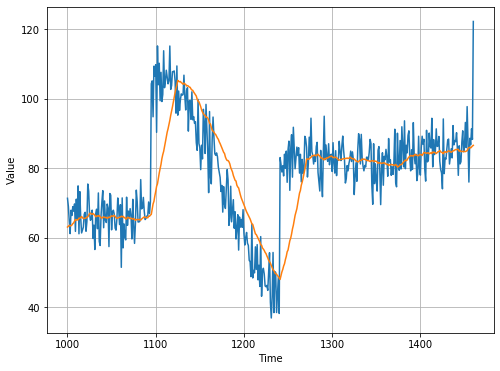

In [15]:
moving_avg = moving_average_forecast(series, 30)[split_time -30:]

plt.figure(figsize=(8,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [16]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


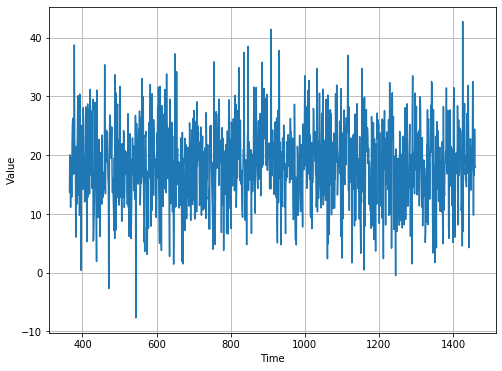

In [17]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(8,6))
plot_series(diff_time, diff_series)
plt.show()

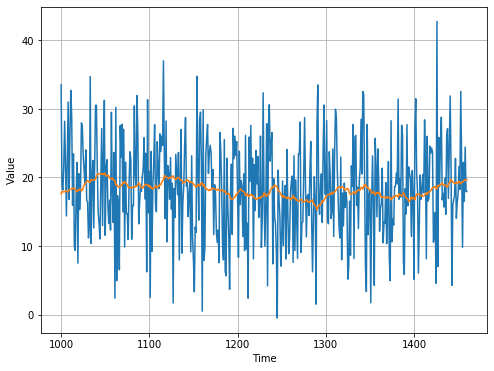

In [18]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time-365-50:]

plt.figure(figsize=(8,6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

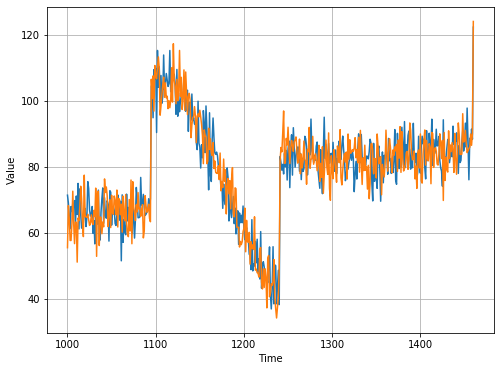

In [19]:
diff_moving_avg_plus_past = series[split_time-365:-365] + diff_moving_avg

plt.figure(figsize=(8,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [20]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

52.973663
5.839311


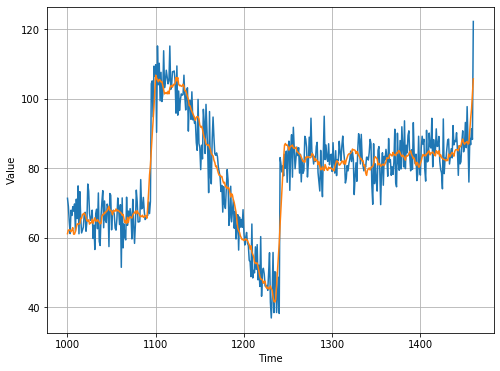

In [21]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time-370:-360],10) + diff_moving_avg

plt.figure(figsize=(8,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [22]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

33.452263
4.569442
